In [351]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [352]:
data = pd.read_csv(r"D:\ML projects\Loan Approval\loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [353]:
data.shape

(4269, 13)

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [355]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [356]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [357]:
data.drop_duplicates()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [358]:
numeric_col = data.select_dtypes(include=['float64','int64']).columns.tolist()
numeric_col

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [359]:
for col in numeric_col:
    data[col] = data[col].replace(-100000,np.nan)

In [360]:
data.isna().sum()

loan_id                      0
no_of_dependents             0
education                    0
self_employed                0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
loan_status                  0
dtype: int64

In [361]:
data[numeric_col] = data[numeric_col].fillna(data[numeric_col].median())
data.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

<Axes: xlabel='residential_assets_value', ylabel='Count'>

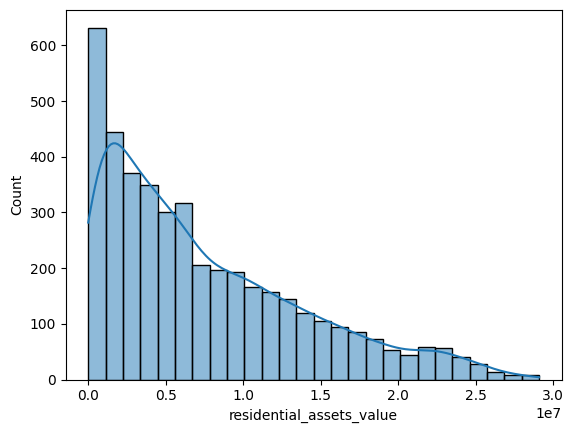

In [362]:
sns.histplot(data['residential_assets_value'], kde = True)

In [363]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.510658e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.476129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.700000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [364]:
for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    Lower_bound = Q1 - 1.5 * IQR

    outliers = data[(data[col]< Lower_bound) | (data[col]>upper_bound)]
    print(f"column: {col}")
    print(f"Outliers : {outliers.shape[0]}")

column: loan_id
Outliers : 0
column: no_of_dependents
Outliers : 0
column: income_annum
Outliers : 0
column: loan_amount
Outliers : 0
column: loan_term
Outliers : 0
column: cibil_score
Outliers : 0
column: residential_assets_value
Outliers : 52
column: commercial_assets_value
Outliers : 37
column: luxury_assets_value
Outliers : 0
column: bank_asset_value
Outliers : 5


<Axes: xlabel='bank_asset_value', ylabel='Count'>

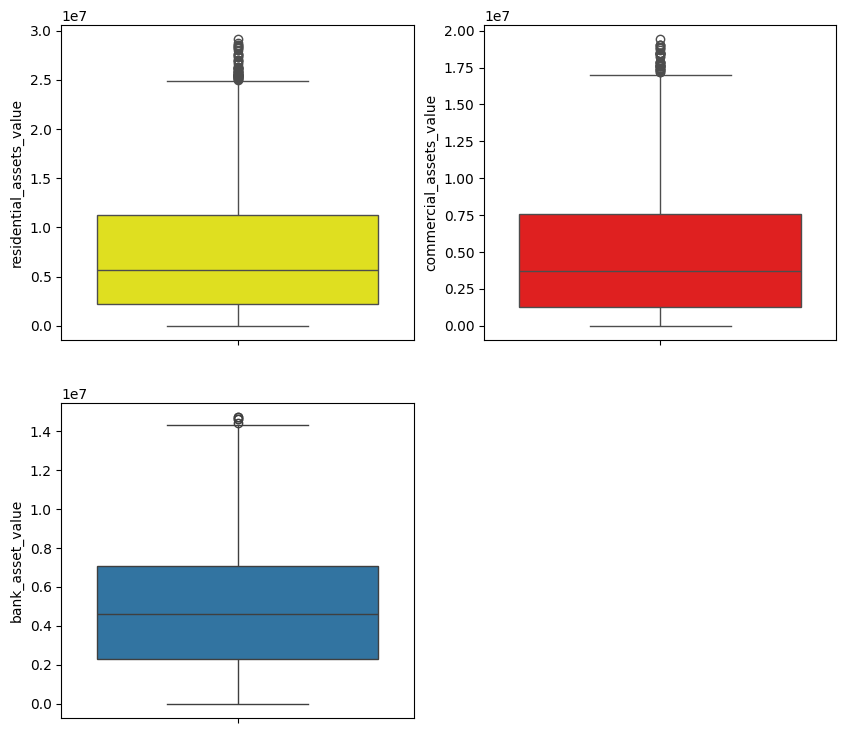

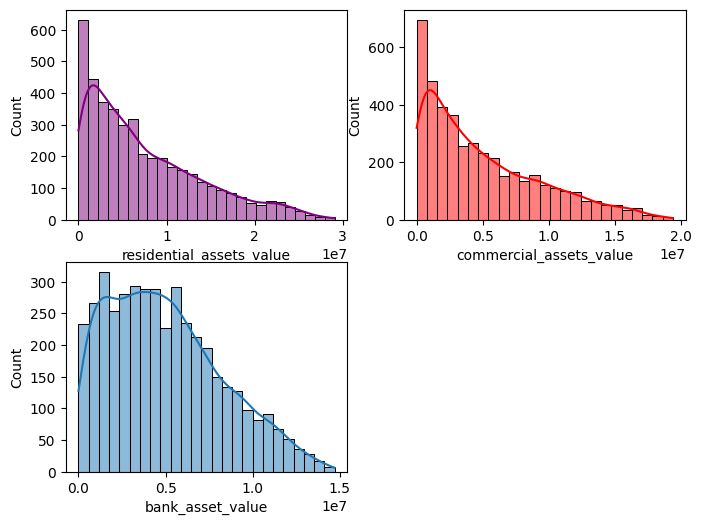

In [365]:
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
sns.boxplot(y=data['residential_assets_value'], color='Yellow')


plt.subplot(2,2,2)
sns.boxplot(y=data['commercial_assets_value'], color='Red')


plt.subplot(2,2,3)
sns.boxplot(y=data['bank_asset_value'])

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(data['residential_assets_value'], color='purple', kde = True)


plt.subplot(2,2,2)
sns.histplot(data['commercial_assets_value'], color='Red', kde = True)


plt.subplot(2,2,3)
sns.histplot(data['bank_asset_value'], kde=True)



In [366]:
outliers_col = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
for col in outliers_col:
     data[f"{col}_boxcox"], _ = stats.boxcox(data[col] + 1)

In [367]:
for col in outliers_col:
    Q1 = data[f"{col}_boxcox"].quantile(0.25)
    Q3 = data[f"{col}_boxcox"].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    Lower_bound = Q1 - 1.5 * IQR

    outliers = data[(data[f"{col}_boxcox"]< Lower_bound) | (data[f"{col}_boxcox"]>upper_bound)]
    print(f"column: {col}")
    print(f"Outliers : {outliers.shape[0]}")
    

column: residential_assets_value
Outliers : 0
column: commercial_assets_value
Outliers : 0
column: bank_asset_value
Outliers : 0


<Axes: xlabel='bank_asset_value_boxcox', ylabel='Count'>

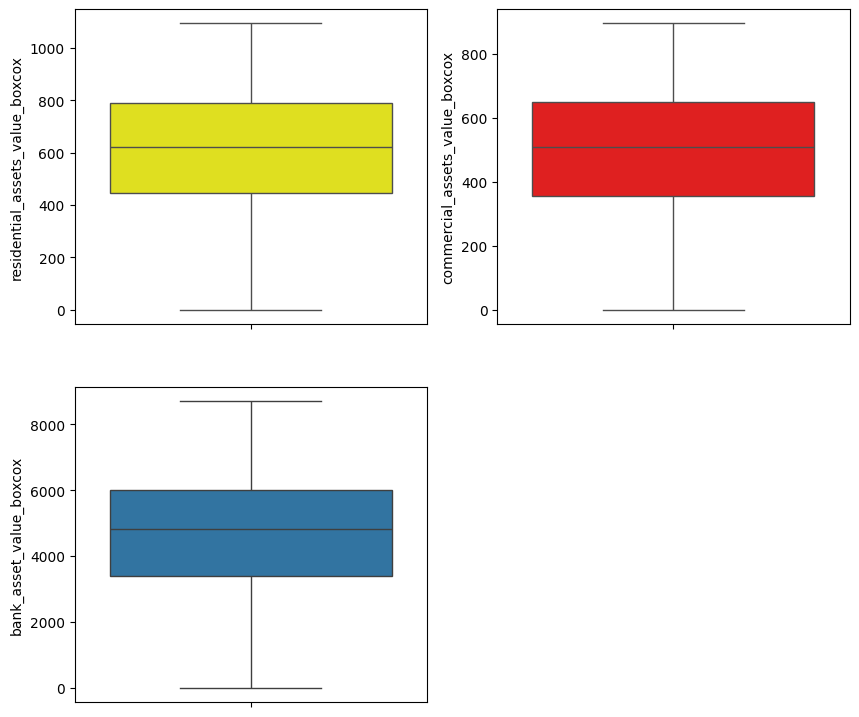

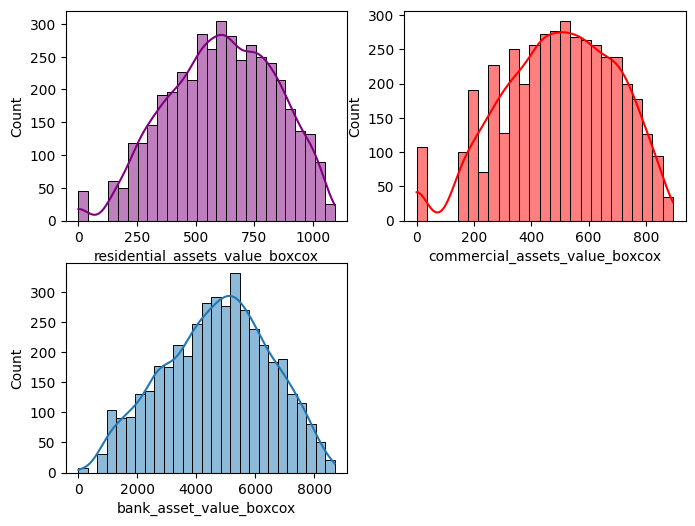

In [368]:
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
sns.boxplot(y=data['residential_assets_value_boxcox'], color='Yellow')


plt.subplot(2,2,2)
sns.boxplot(y=data['commercial_assets_value_boxcox'], color='Red')


plt.subplot(2,2,3)
sns.boxplot(y=data['bank_asset_value_boxcox'])

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(data['residential_assets_value_boxcox'], color='purple', kde = True)


plt.subplot(2,2,2)
sns.histplot(data['commercial_assets_value_boxcox'], color='Red', kde = True)


plt.subplot(2,2,3)
sns.histplot(data['bank_asset_value_boxcox'], kde=True)

In [369]:
numeric_col

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

<Axes: xlabel='no_of_dependents', ylabel='Count'>

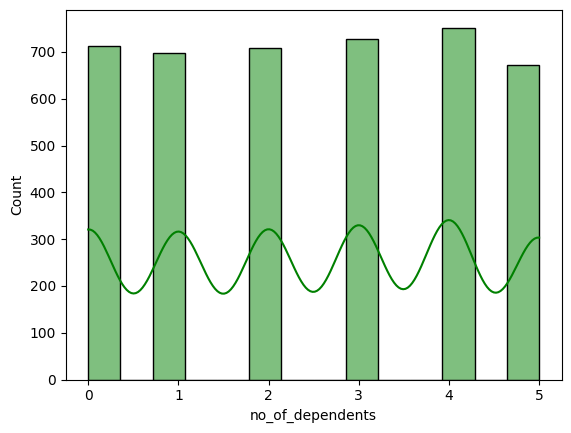

In [370]:
plt.Figure(figsize=(8,6))

sns.histplot(data = data, x='no_of_dependents', kde = True,color='green')





<Axes: xlabel='income_annum', ylabel='Count'>

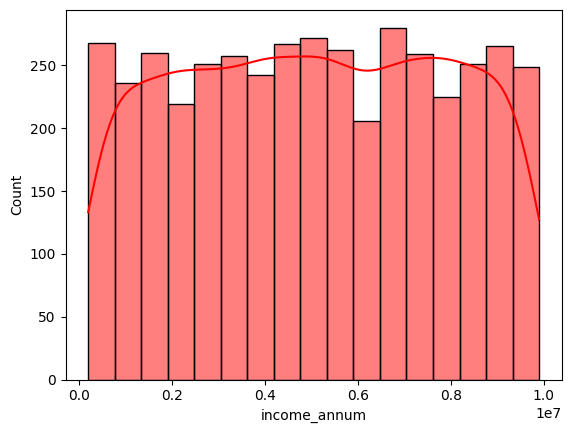

In [371]:
sns.histplot(data = data, x='income_annum', kde = True, color='red')

<Axes: xlabel='loan_amount', ylabel='Count'>

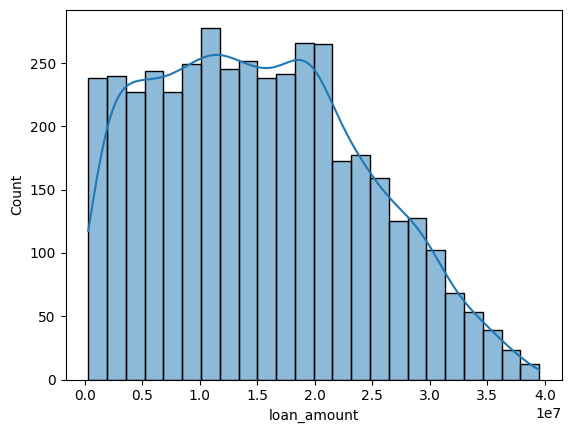

In [372]:
sns.histplot(data = data, x='loan_amount', kde = True)

<Axes: xlabel='loan_term', ylabel='Count'>

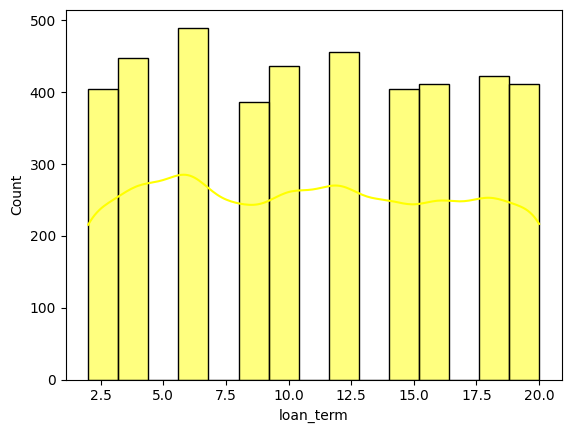

In [373]:
sns.histplot(data = data, x='loan_term', kde = True, color='yellow')

<Axes: xlabel='cibil_score', ylabel='Count'>

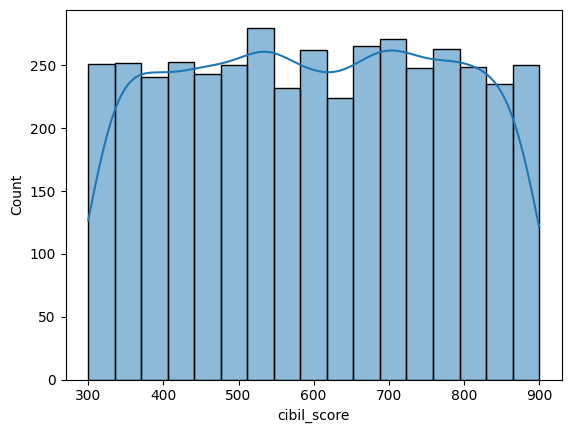

In [374]:
sns.histplot(data = data, x='cibil_score', kde = True)


<Axes: xlabel='residential_assets_value_boxcox', ylabel='Count'>

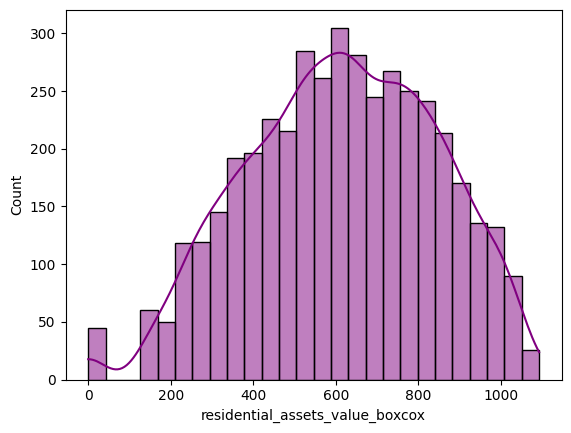

In [375]:
sns.histplot(data = data, x='residential_assets_value_boxcox', kde = True, color='purple')

<Axes: xlabel='commercial_assets_value_boxcox', ylabel='Count'>

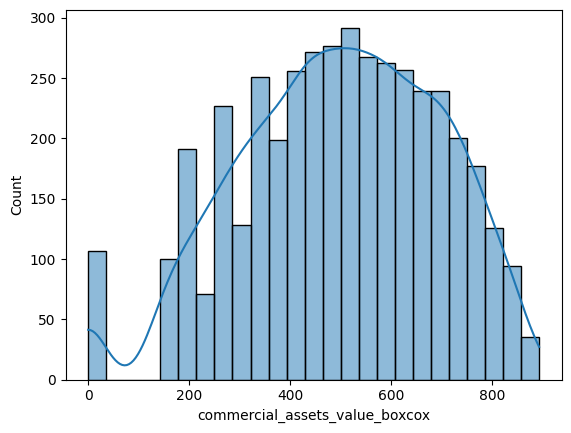

In [376]:
sns.histplot(data = data, x='commercial_assets_value_boxcox', kde = True)

<Axes: xlabel='luxury_assets_value', ylabel='Count'>

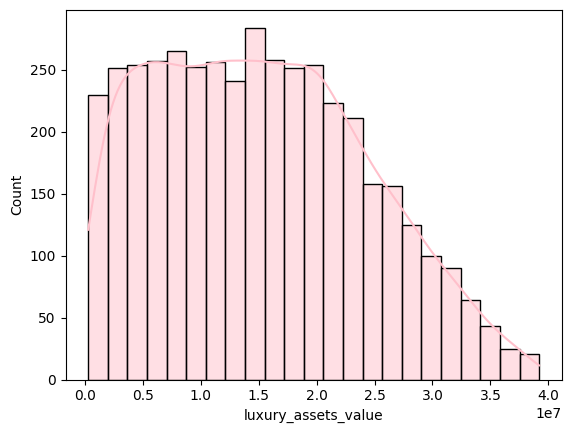

In [377]:
sns.histplot(data = data, x='luxury_assets_value', kde = True,color='pink')


<Axes: xlabel='bank_asset_value_boxcox', ylabel='Count'>

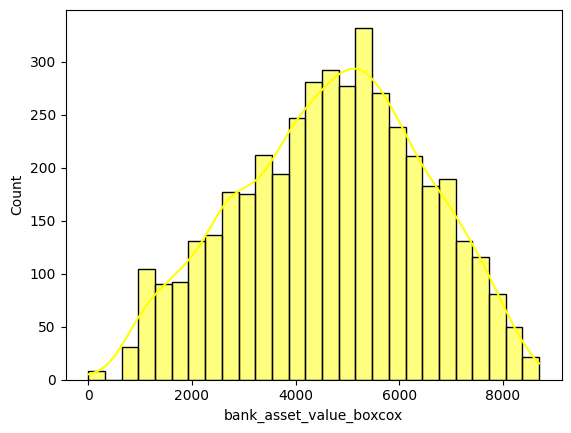

In [378]:

sns.histplot(data = data, x='bank_asset_value_boxcox', kde = True, color='yellow')

In [379]:
categorical_col = data.select_dtypes(include=['object'])
categorical_col

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


<Axes: xlabel='loan_status', ylabel='count'>

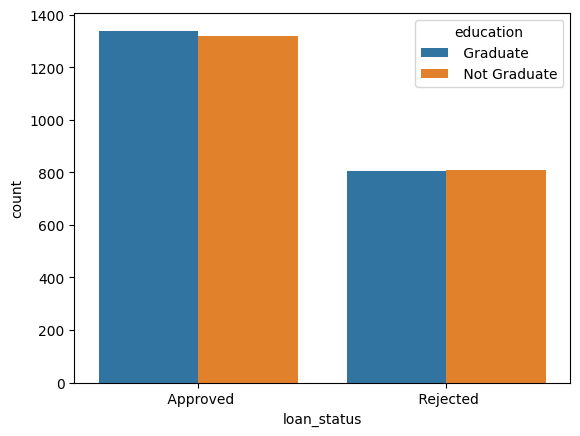

In [380]:
sns.countplot(data=data, x='loan_status',hue='education')

<Axes: xlabel='loan_status', ylabel='count'>

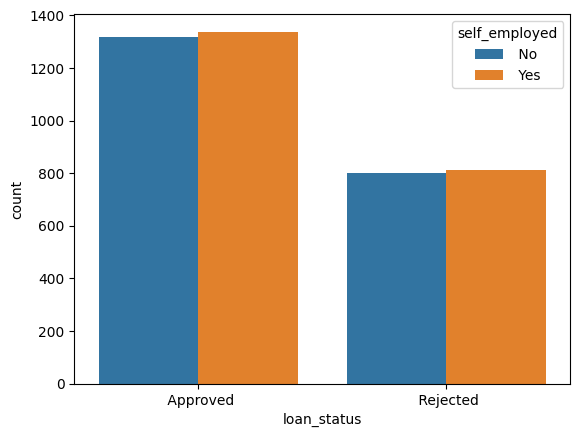

In [381]:
sns.countplot(data=data, x='loan_status',hue='self_employed')

In [382]:
data_encode = pd.get_dummies(data)
data_encode = data_encode.astype(int)
data_encode.head()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_value_boxcox,commercial_assets_value_boxcox,bank_asset_value_boxcox,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,459,864,6381,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,479,423,4066,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,670,541,8106,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,928,487,6341,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,813,665,5024,0,1,0,1,0,1


In [383]:
data_encode.corr(numeric_only=True)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_value_boxcox,commercial_assets_value_boxcox,bank_asset_value_boxcox,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.021383,0.018595,-0.000862,0.010765,0.029611,0.020208,0.013036,0.015536,-0.015536,-0.001745,0.001745,0.017685,-0.017685
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007783,-0.001531,0.002817,0.011163,0.010126,0.007039,0.012387,0.002697,-0.002697,-0.000765,0.000765,-0.018114,0.018114
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.634750,0.640328,0.929145,0.851093,0.629997,0.631713,0.880820,0.011625,-0.011625,-0.002368,0.002368,-0.015189,0.015189
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.592698,0.603188,0.860914,0.788122,0.588495,0.595824,0.817091,0.010631,-0.010631,-0.001450,0.001450,0.016150,-0.016150
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.007785,-0.005478,0.012490,0.017177,0.002741,-0.000125,0.016447,-0.008417,0.008417,-0.004107,0.004107,-0.113036,0.113036
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.018739,-0.003769,-0.028618,-0.015478,-0.026445,-0.003608,-0.021207,-0.004649,0.004649,0.004866,-0.004866,0.770518,-0.770518
residential_assets_value,0.021383,0.007783,0.634750,0.592698,0.007785,-0.018739,1.000000,0.414122,0.589053,0.525607,0.935352,0.410046,0.547419,0.012209,-0.012209,-0.006547,0.006547,-0.015042,0.015042
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414122,1.000000,0.591128,0.548576,0.406246,0.924478,0.567523,-0.006763,0.006763,0.017998,-0.017998,0.008246,-0.008246
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.589053,0.591128,1.000000,0.788517,0.585897,0.585176,0.815510,0.012471,-0.012471,-0.004413,0.004413,-0.015465,0.015465
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.525607,0.548576,0.788517,1.000000,0.525136,0.543661,0.976409,0.009424,-0.009424,0.000215,-0.000215,-0.006778,0.006778


<Axes: >

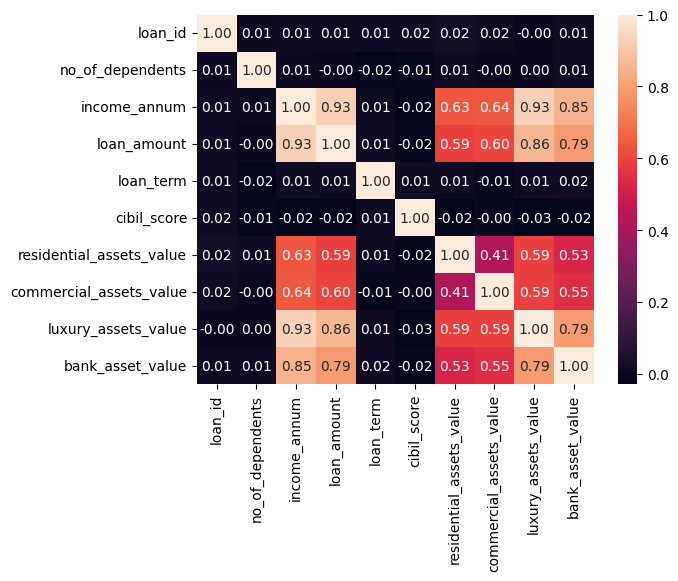

In [384]:
sns.heatmap(data[numeric_col].corr(),annot=True, fmt=".2f")

In [385]:
data_encode.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_value_boxcox,commercial_assets_value_boxcox,bank_asset_value_boxcox,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,459,864,6381,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,479,423,4066,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,670,541,8106,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,928,487,6341,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,813,665,5024,0,1,0,1,0,1


In [386]:
x = data_encode.drop(columns=['loan_id', 'self_employed_ No', 'self_employed_ Yes','education_ Not Graduate','education_ Graduate','loan_status_ Approved','loan_status_ Rejected'], axis=1)
x.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_value_boxcox,commercial_assets_value_boxcox,bank_asset_value_boxcox
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,459,864,6381
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,479,423,4066
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,670,541,8106
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,928,487,6341
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,813,665,5024


In [387]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(data['loan_status']))
print(y.head())

0    0
1    1
2    1
3    1
4    1
dtype: int64


In [388]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [389]:
Logistic_model = LogisticRegression(max_iter=1000)
model = Logistic_model.fit(X_train,y_train)

c:\Users\aleen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [390]:
y_pred = model.predict(X_test)


In [392]:
report = classification_report(y_test,y_pred)
print(f"{report}")

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       536
           1       0.83      0.79      0.81       318

    accuracy                           0.86       854
   macro avg       0.85      0.85      0.85       854
weighted avg       0.86      0.86      0.86       854



In [393]:
y_pred_train = model.predict(X_train)
report = classification_report(y_train,y_pred_train)
print(f"{report}")

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2120
           1       0.87      0.82      0.85      1295

    accuracy                           0.89      3415
   macro avg       0.88      0.87      0.88      3415
weighted avg       0.89      0.89      0.89      3415



In [394]:
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=5)
decision_tree_model.fit(X_train, y_train)
Y_Pred_DT = decision_tree_model.predict(X_test)


In [395]:
report = classification_report(y_test,Y_Pred_DT)
print(f"{report}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [396]:
Y_Pred_DT = decision_tree_model.predict(X_train)
report = classification_report(y_train,Y_Pred_DT)
print(f"Report on Training {report}")

Report on Training               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



In [397]:
cross_validation = cross_val_score(decision_tree_model,x,y,cv=5, scoring='accuracy')
print(f"Average Accuracy is: {cross_validation.mean()}")

Average Accuracy is: 0.9770431402049796
